# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first and forwhile.
The corpus have many bills but we tried to create a sample for Rolling Stones and New York Times album review.
When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

 - **Most common words** - find these and create word clouds
 - **Size of vocabulary** - look number of unique words and also how quickly someone speaks
 - **Amount of profanity** - most common terms

## Most common word

### Analysis
    for each decade analyse

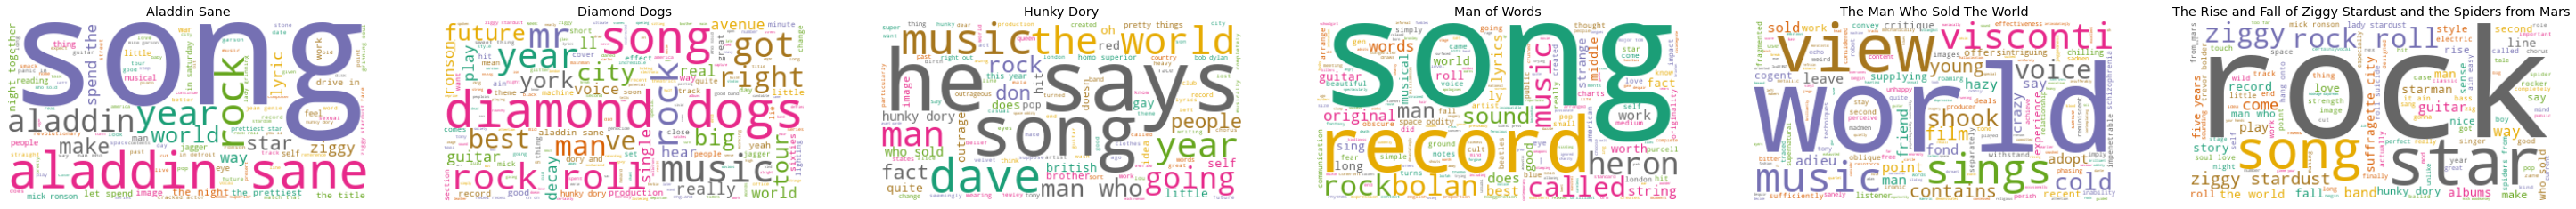

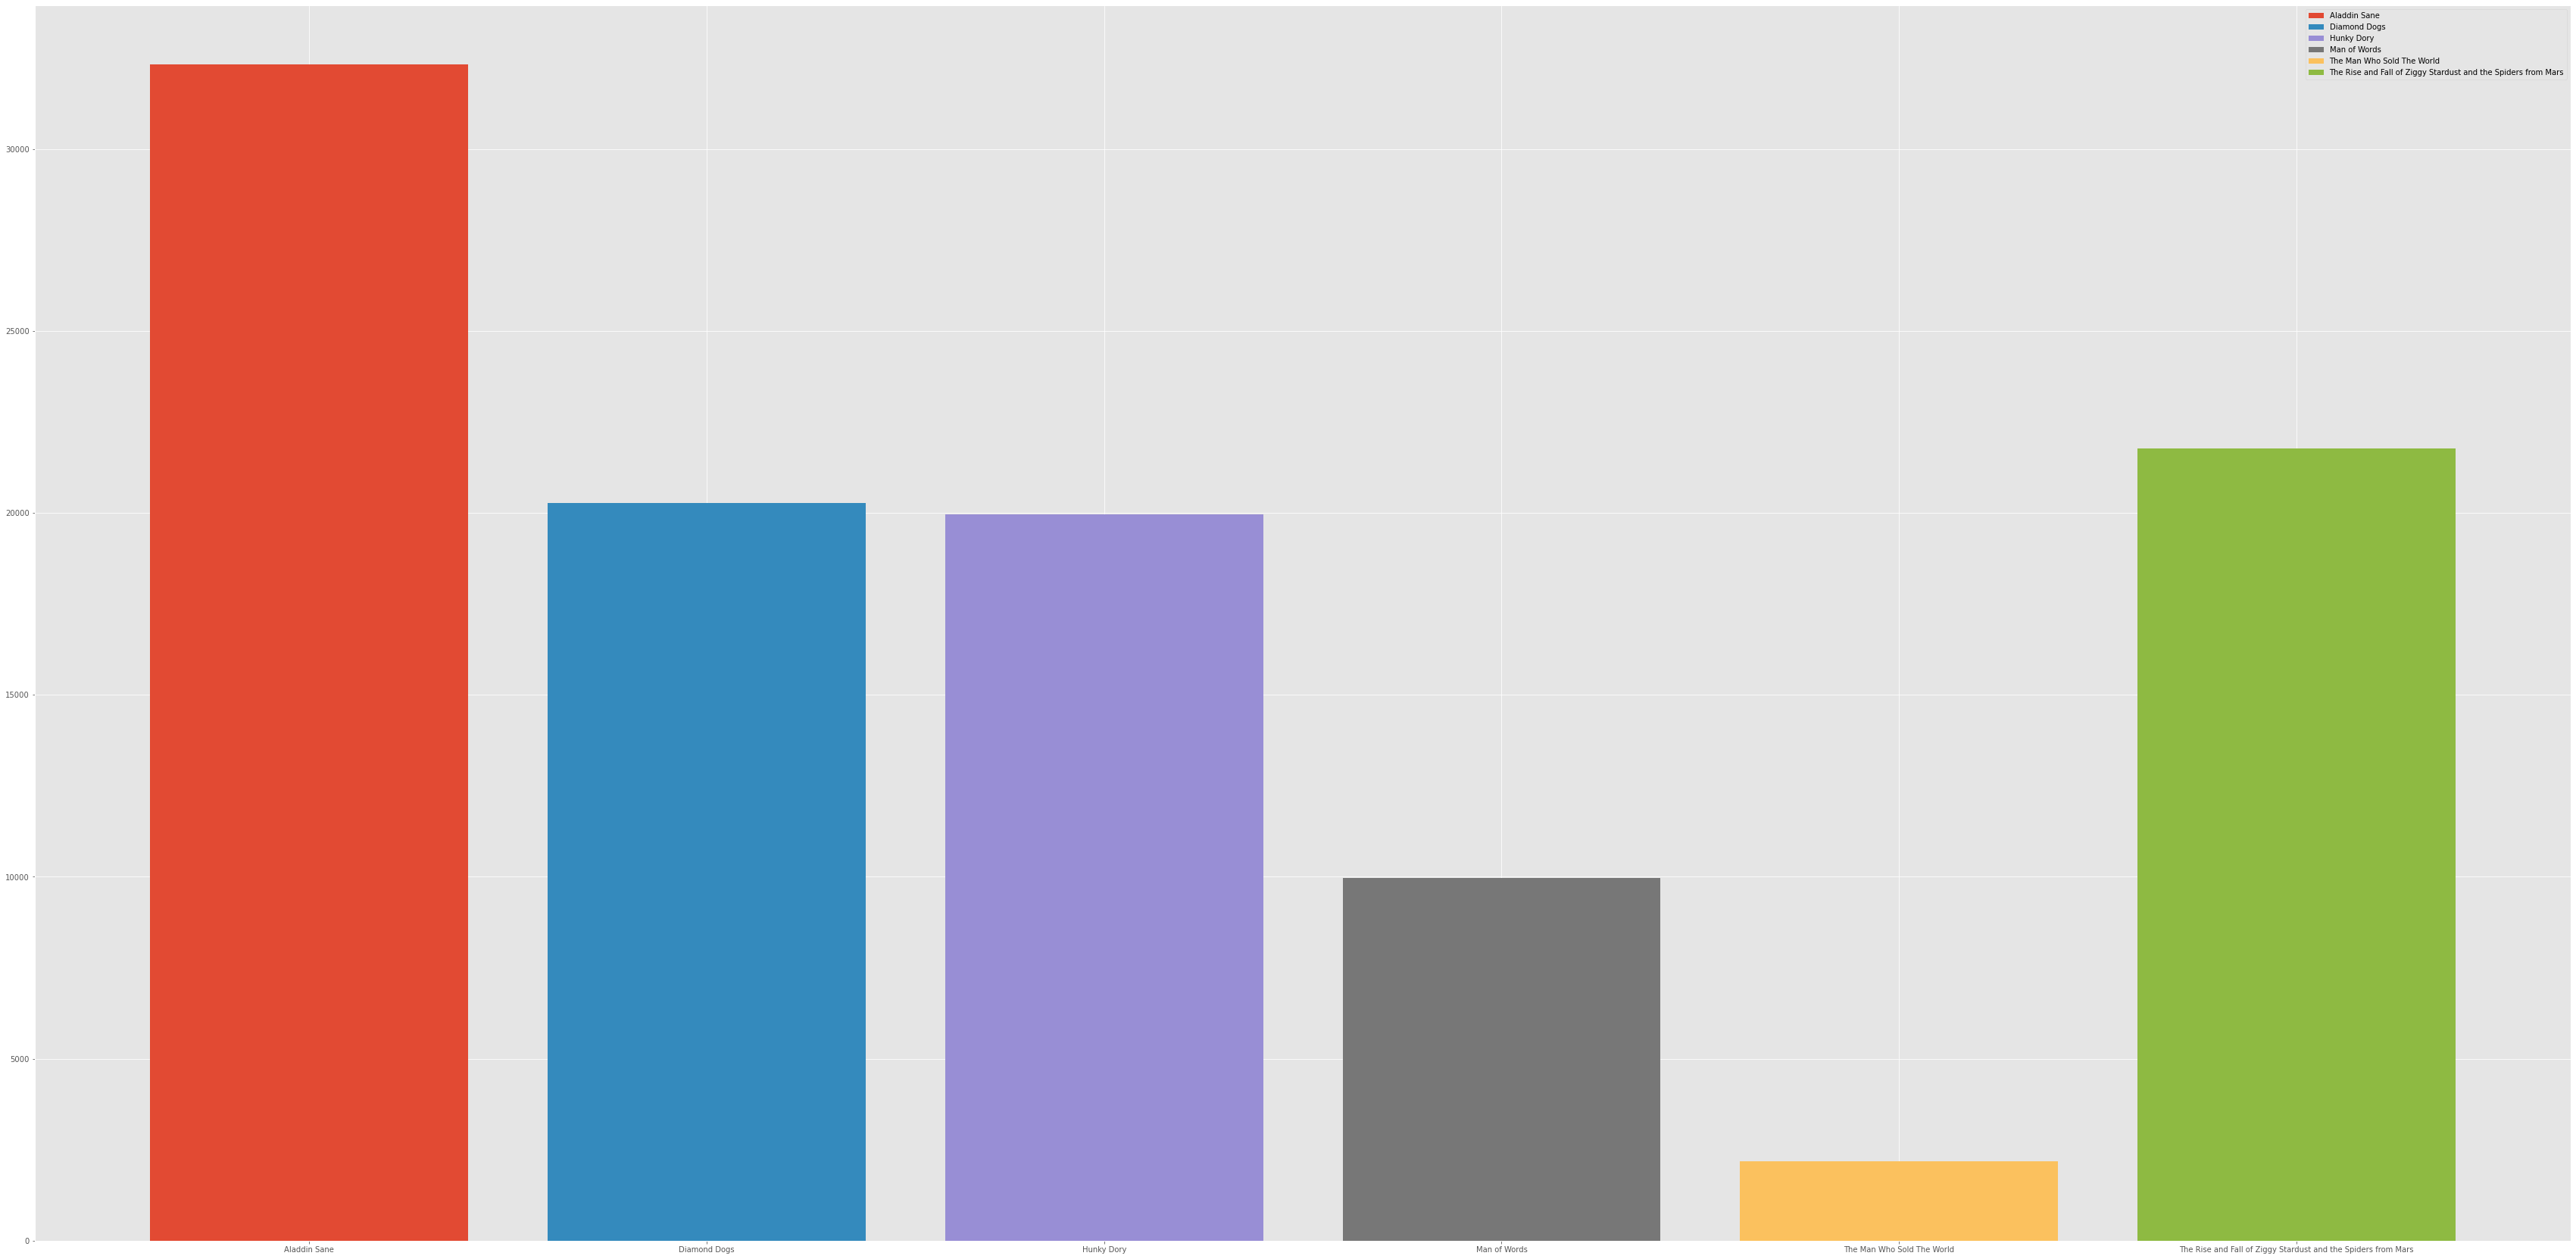

In [39]:
# Read in the document-term matrix
import pandas as pd

# for Ronson's
data_album_ronson_dtm = pd.read_pickle('./data/pickle/groups/ronson_corpus_dtm.pkl')
data_album_ronson = pd.read_pickle('./data/pickle/groups/ronson_corpus.pkl')
data_album_ronson_dtm = data_album_ronson_dtm.transpose()

# Find the top 30 words said by each album
top_dict_ronson = {}
for c in data_album_ronson_dtm.columns:
    top = data_album_ronson_dtm[c].sort_values(ascending=False).head(30)
    top_dict_ronson[c]= list(zip(top.index, top.values))
# top_dict


# Print the top 15 words said by each album
# for album, top_words in top_dict.items():
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each album
words_ronson = []
for album in data_album_ronson_dtm.columns:
    top = [word for (word, count) in top_dict_ronson[album]]
    for t in top:
        words_ronson.append(t)


# If more than half of the album have it as a top word, exclude it from the list
add_stop_words_ronson = [word for word, count in Counter(words_ronson).most_common() if count > 6]
# add_stop_words_ronson

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean_ronson = pd.read_pickle('./data/pickle/groups/ronson_corpus.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words_ronson)


# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_ronson_corpus_cv = cv.fit_transform(data_clean_ronson['texte'])
data_ronson_corpus_dtm = pd.DataFrame(data_ronson_corpus_cv.toarray(), columns=cv.get_feature_names())
data_ronson_corpus_dtm.index = data_clean_ronson.album

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_ronson_corpus_dtm.to_pickle("././data/pickle/groups/data_ronson_corpus_dtm.pkl")


from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=600, random_state=50)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, album in enumerate(data_album_ronson_dtm.columns):
    wc.generate(data_clean_ronson.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_clean_ronson.album[index])

plt.show()

# Quantité de mot suivant l'albulm?
fig, ax = plt.subplots()
for index, album in data_clean_ronson.iterrows():
    ax.bar(data_clean_ronson.album[index], len(data_clean_ronson.texte[index]), label=data_clean_ronson.album[index])
    ax.legend()

plt.show()


# For the Experimental Years


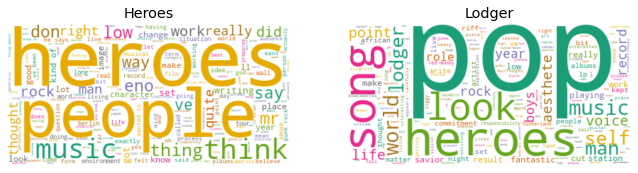

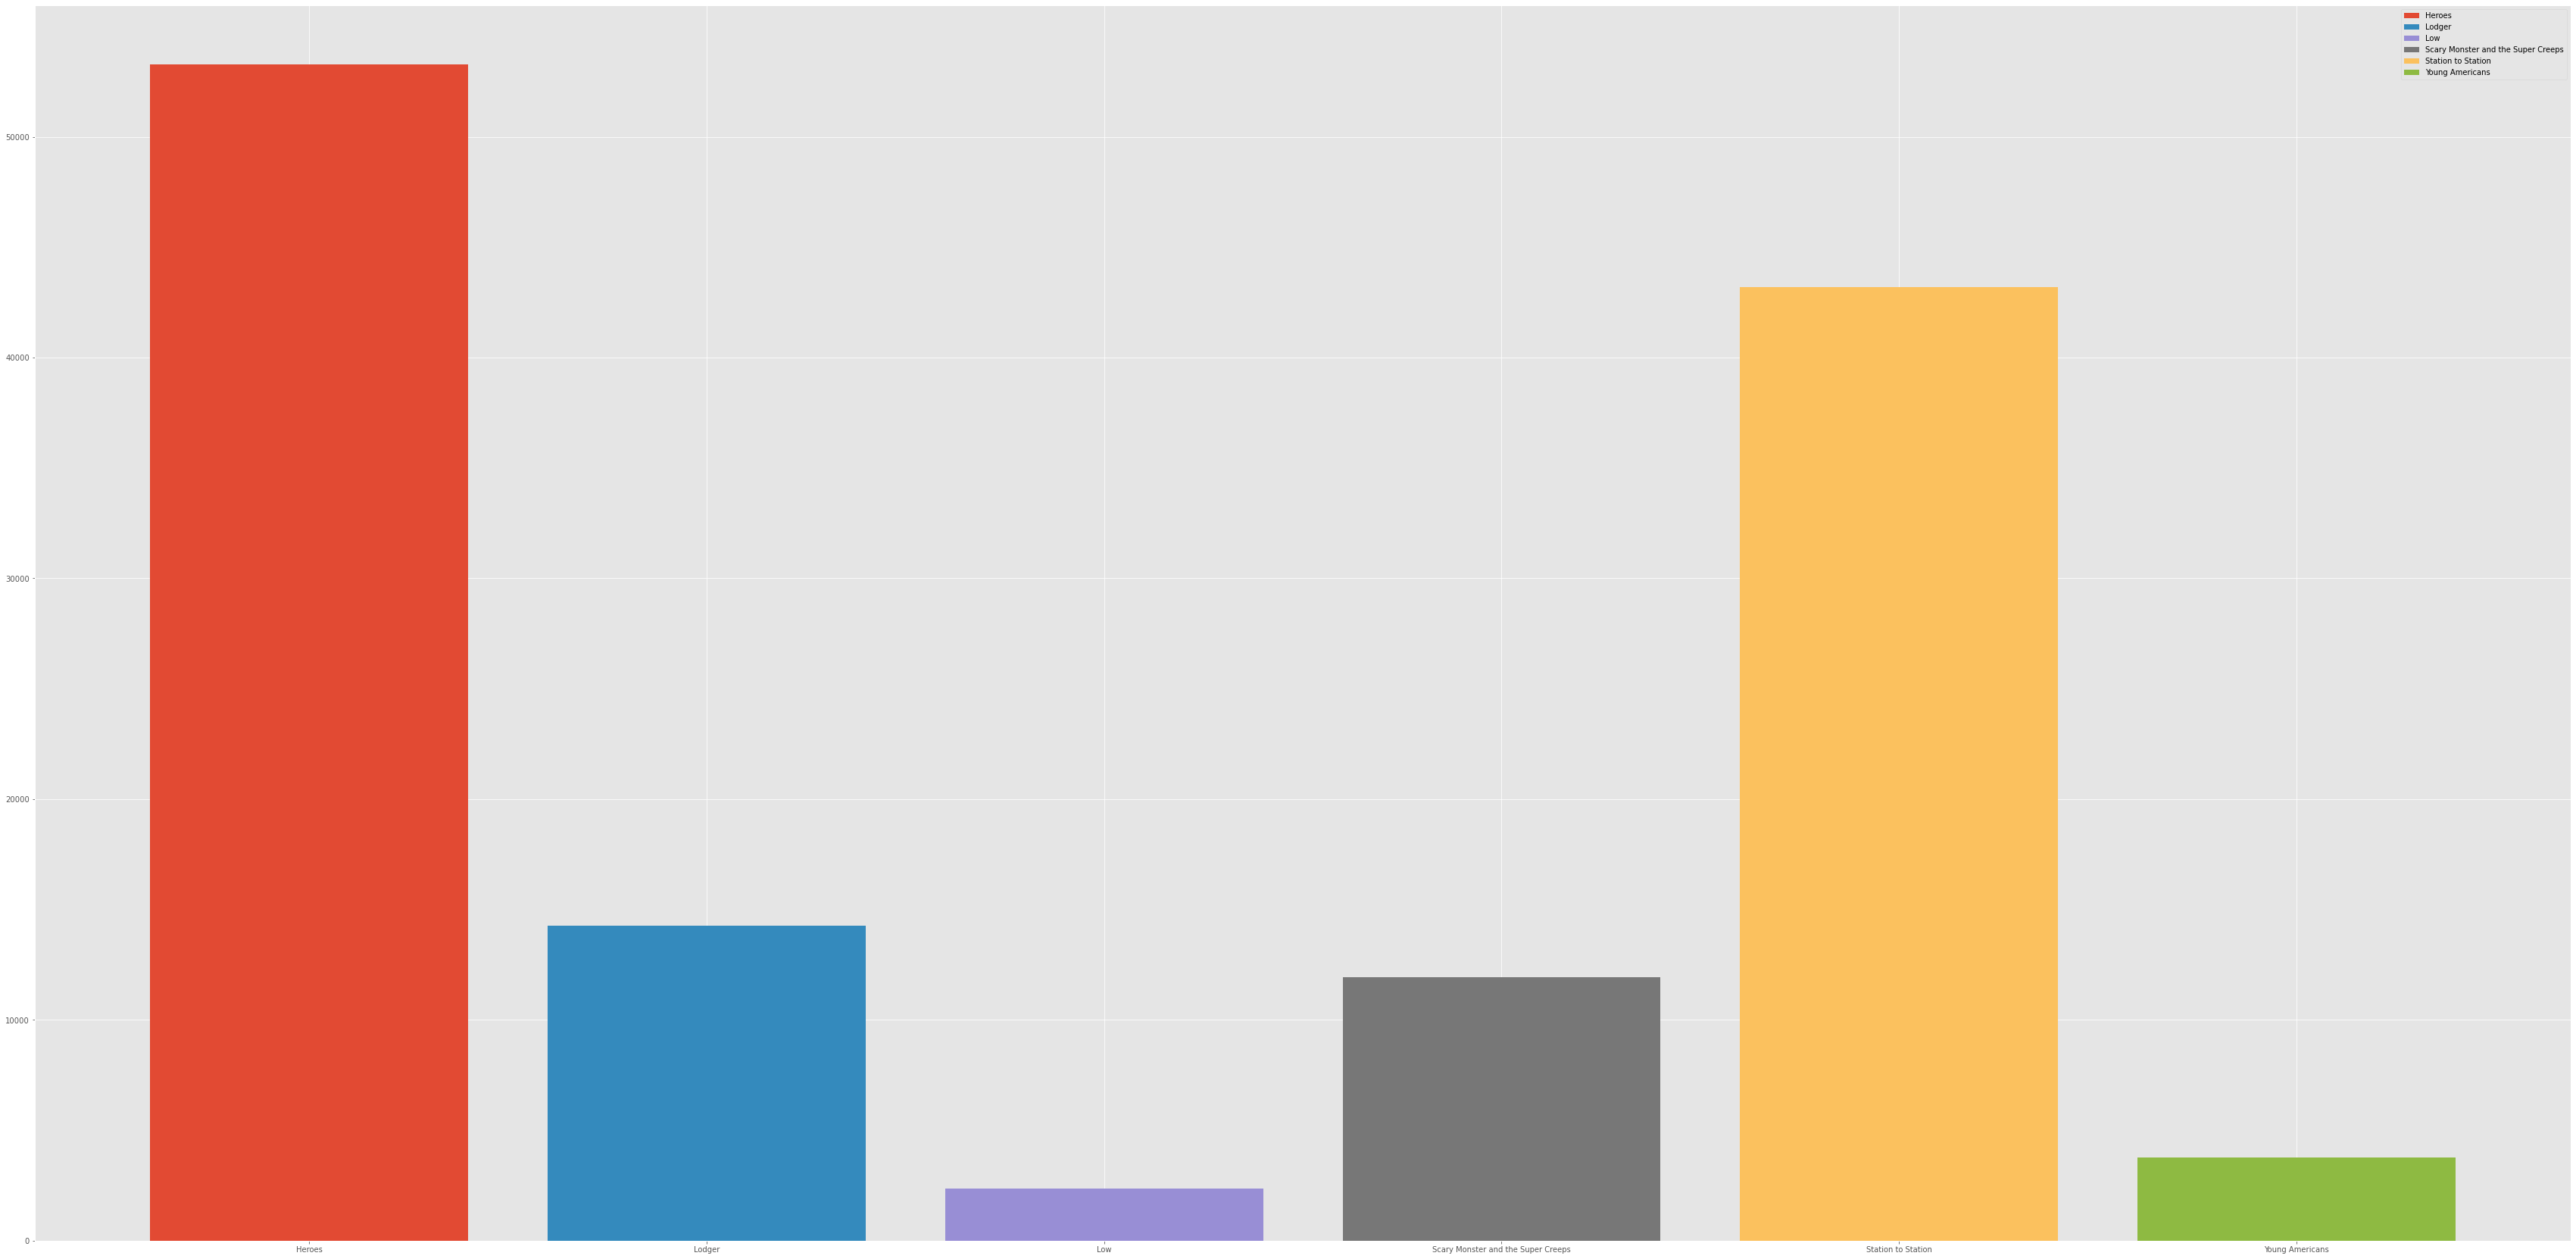

In [50]:
# Read in the document-term matrix
import pandas as pd

# for Ronson's
data_album_experimental_dtm = pd.read_pickle('./data/pickle/groups/experimental_corpus_dtm.pkl')
data_album_experimental = pd.read_pickle('./data/pickle/groups/experimental_corpus.pkl')
data_album_experimental_dtm = data_album_experimental_dtm.transpose()

# Find the top 30 words said by each album
top_dict_experimental = {}
for c in data_album_experimental_dtm.columns:
    top = data_album_experimental_dtm[c].sort_values(ascending=False).head(30)
    top_dict_experimental[c]= list(zip(top.index, top.values))
# top_dict


# Print the top 15 words said by each album
# for album, top_words in top_dict.items():
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each album
words_experimental = []
for album in data_album_experimental_dtm.columns:
    top = [word for (word, count) in top_dict_experimental[album]]
    for t in top:
        words_experimental.append(t)


# If more than half of the album have it as a top word, exclude it from the list
add_stop_words_experimental = [word for word, count in Counter(words_experimental).most_common() if count > 6]
# add_stop_words_ronson

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean_experimental = pd.read_pickle('./data/pickle/groups/experimental_corpus.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words_experimental)


# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_experimental_corpus_cv = cv.fit_transform(data_clean_experimental['texte'])
data_experimental_corpus_dtm = pd.DataFrame(data_experimental_corpus_cv.toarray(), columns=cv.get_feature_names())
data_experimental_corpus_dtm.index = data_clean_experimental.album

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_experimental_corpus_dtm.to_pickle("././data/pickle/groups/data_experimental_corpus_dtm.pkl")


from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=600, random_state=50)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, album in enumerate(data_clean_experimental.columns):
    wc.generate(data_clean_experimental.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_clean_experimental.album[index])

plt.show()

# Quantité de mot suivant l'album?
fig, ax = plt.subplots()
for index, album in data_clean_experimental.iterrows():
    ax.bar(data_clean_experimental.album[index], len(data_clean_experimental.texte[index]), label=data_clean_experimental.album[index])
    ax.legend()

plt.show()

# For the Demise Years


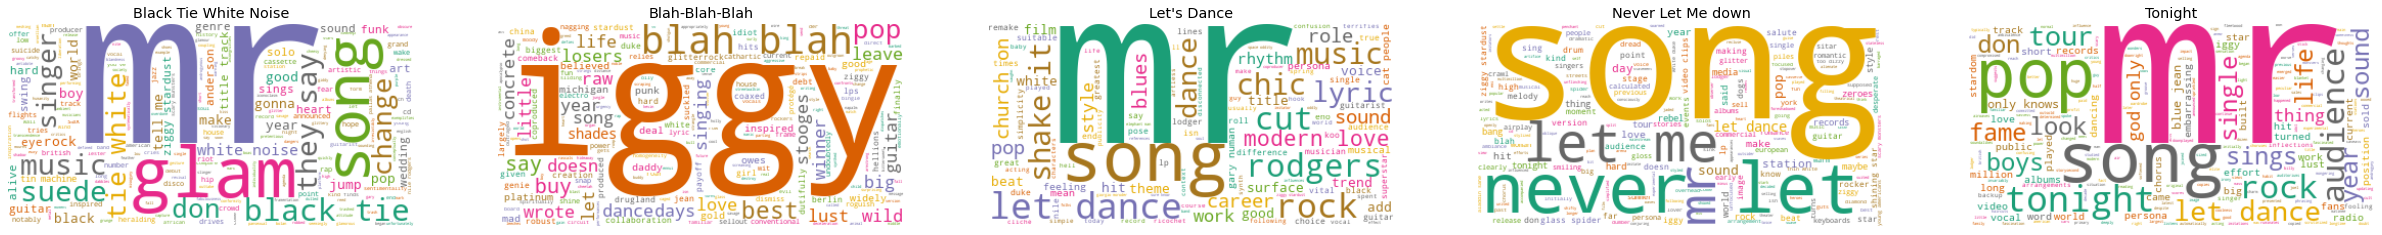

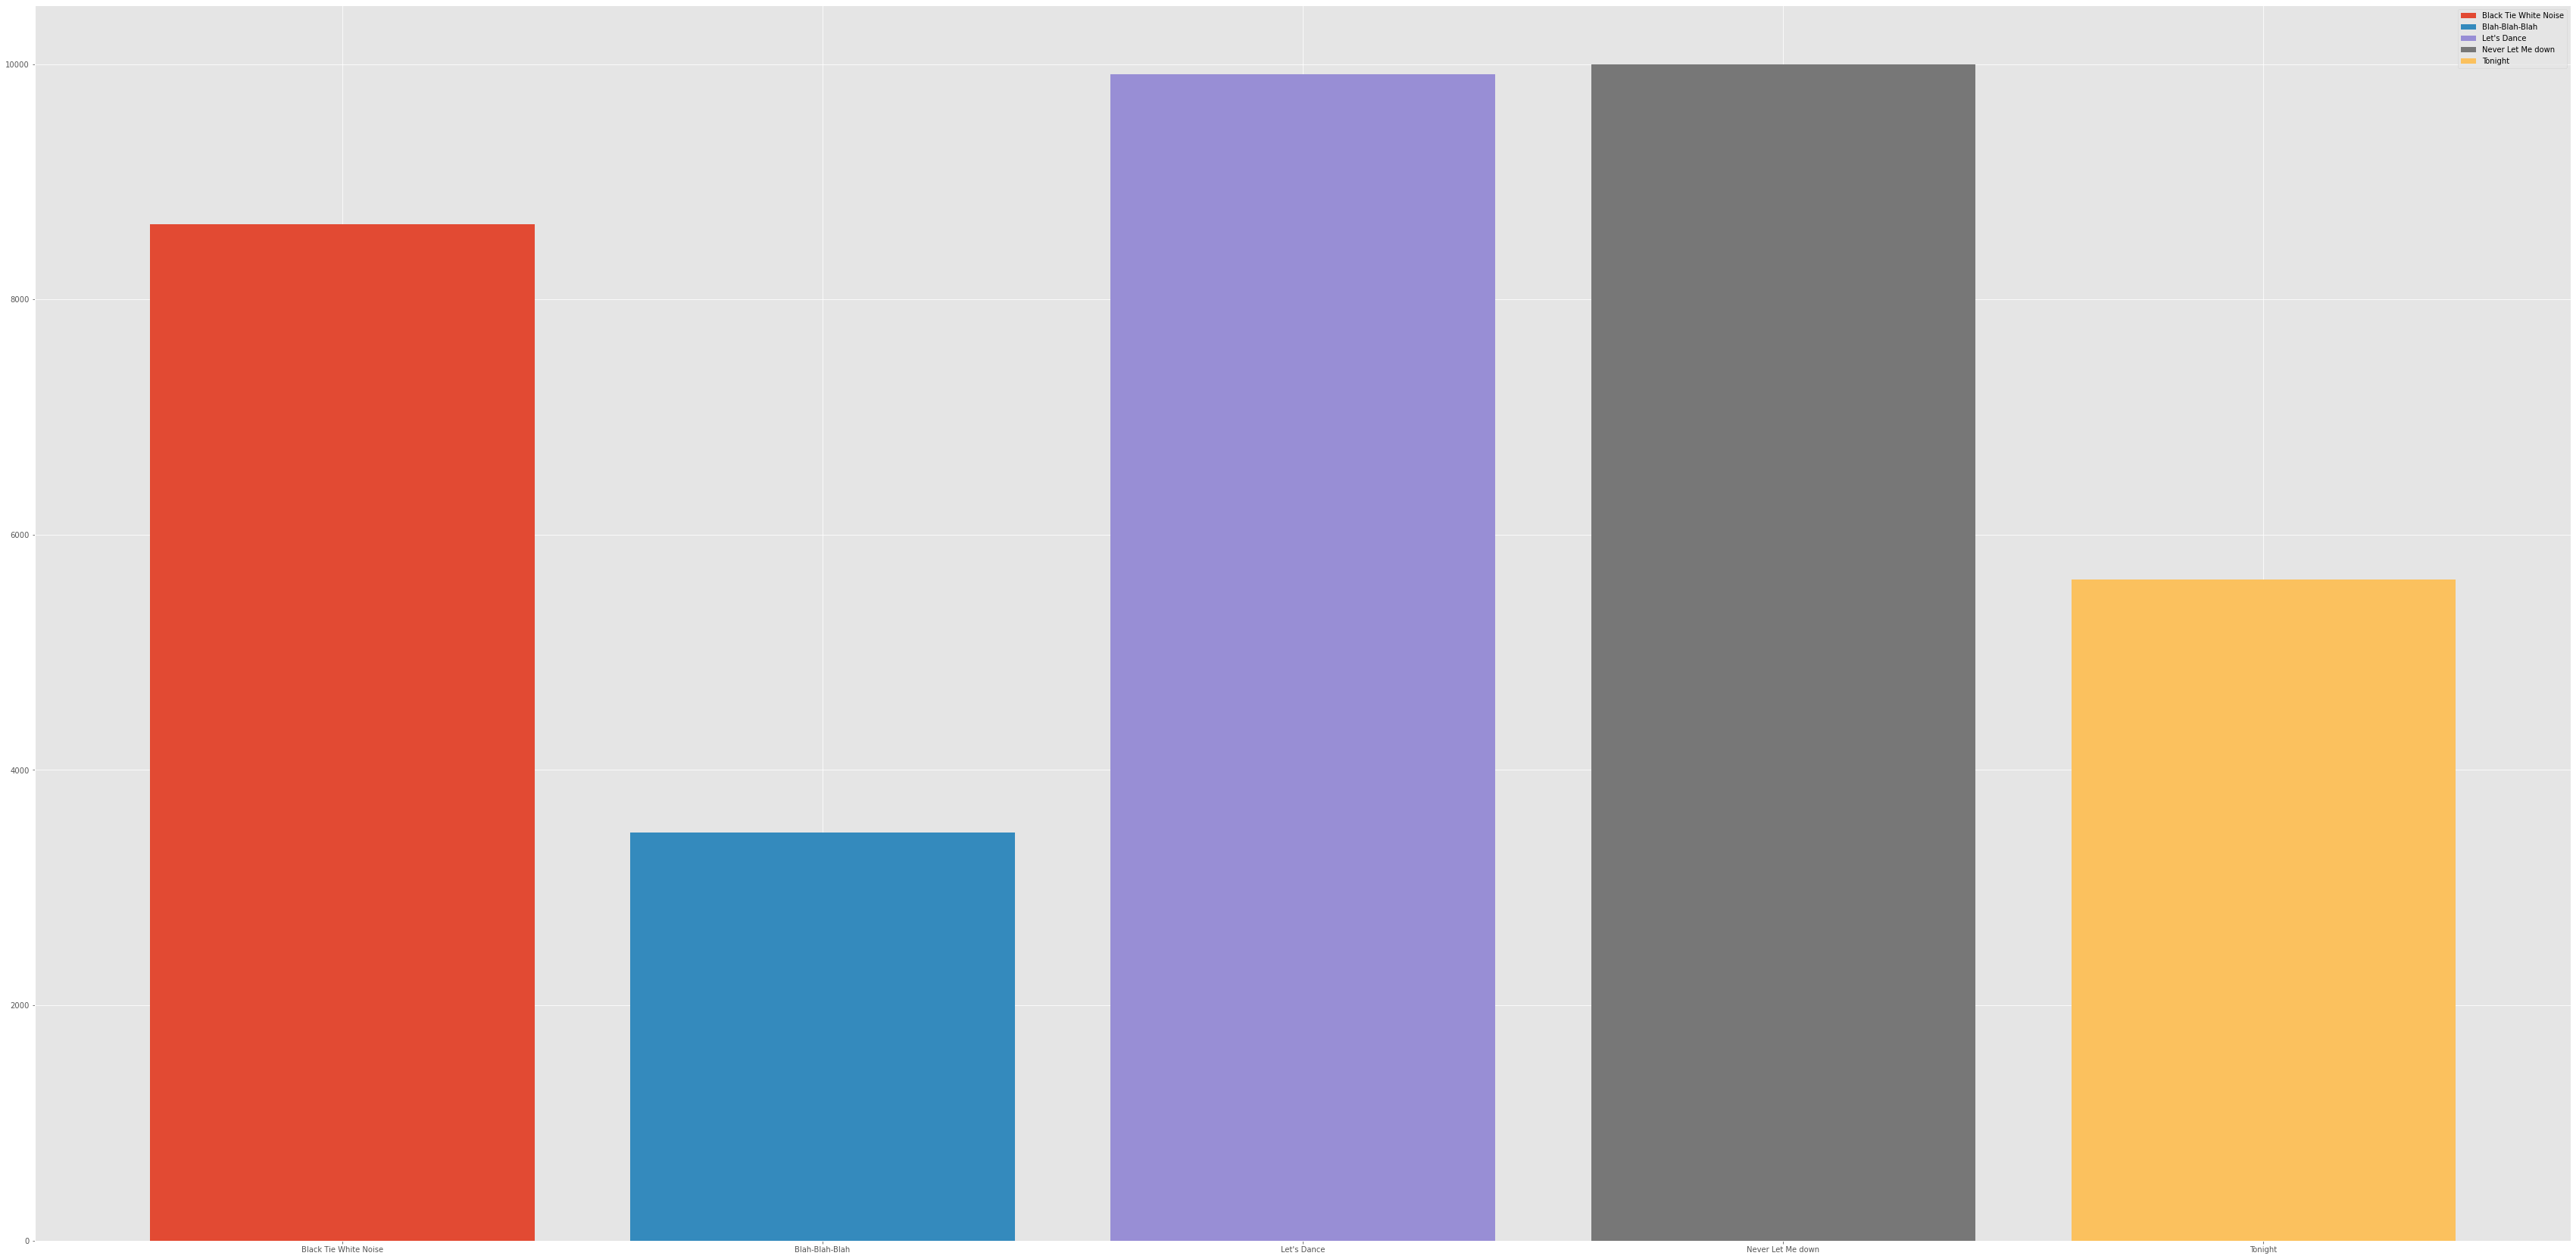

In [7]:
# Read in the document-term matrix
import pandas as pd

# for Demise Years
data_album_demise_dtm = pd.read_pickle('./data/pickle/groups/demise_corpus.pkl')
data_album_demise = pd.read_pickle('./data/pickle/groups/demise_corpus.pkl')
data_album_demise_dtm = data_album_demise_dtm.transpose()

# Find the top 30 words said by each album
top_dict_demise = {}
for c in data_album_demise_dtm.columns:
    top = data_album_demise_dtm[c].sort_values(ascending=False).head(30)
    top_dict_demise[c]= list(zip(top.index, top.values))
# top_dict


# Print the top 15 words said by each album
# for album, top_words in top_dict.items():
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each album
words_demise = []
for album in data_album_demise_dtm.columns:
    top = [word for (word, count) in top_dict_demise[album]]
    for t in top:
        words_demise.append(t)


# If more than half of the album have it as a top word, exclude it from the list
add_stop_words_demise = [word for word, count in Counter(words_demise).most_common() if count > 6]
# add_stop_words_demise

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean_demise = pd.read_pickle('./data/pickle/groups/demise_corpus.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words_demise)


# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_demise_corpus_cv = cv.fit_transform(data_clean_demise['texte'])
data_demise_corpus_dtm = pd.DataFrame(data_demise_corpus_cv.toarray(), columns=cv.get_feature_names())
data_demise_corpus_dtm.index = data_clean_demise.album

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_demise_corpus_dtm.to_pickle("././data/pickle/groups/data_demise_corpus_dtm.pkl")


from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=600, random_state=50)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, album in enumerate(data_album_demise_dtm.columns):
    wc.generate(data_clean_demise.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_clean_demise.album[index])

plt.show()

# Quantité de mot suivant l'albulm?
fig, ax = plt.subplots()
for index, album in data_clean_demise.iterrows():
    ax.bar(data_clean_demise.album[index], len(data_clean_demise.texte[index]), label=data_clean_demise.album[index])
    ax.legend()

plt.show()


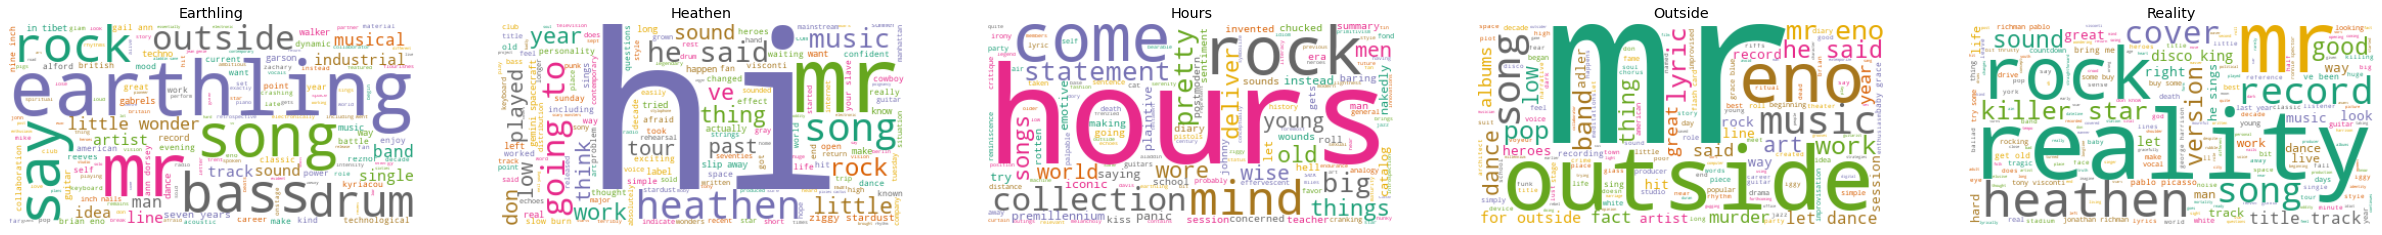

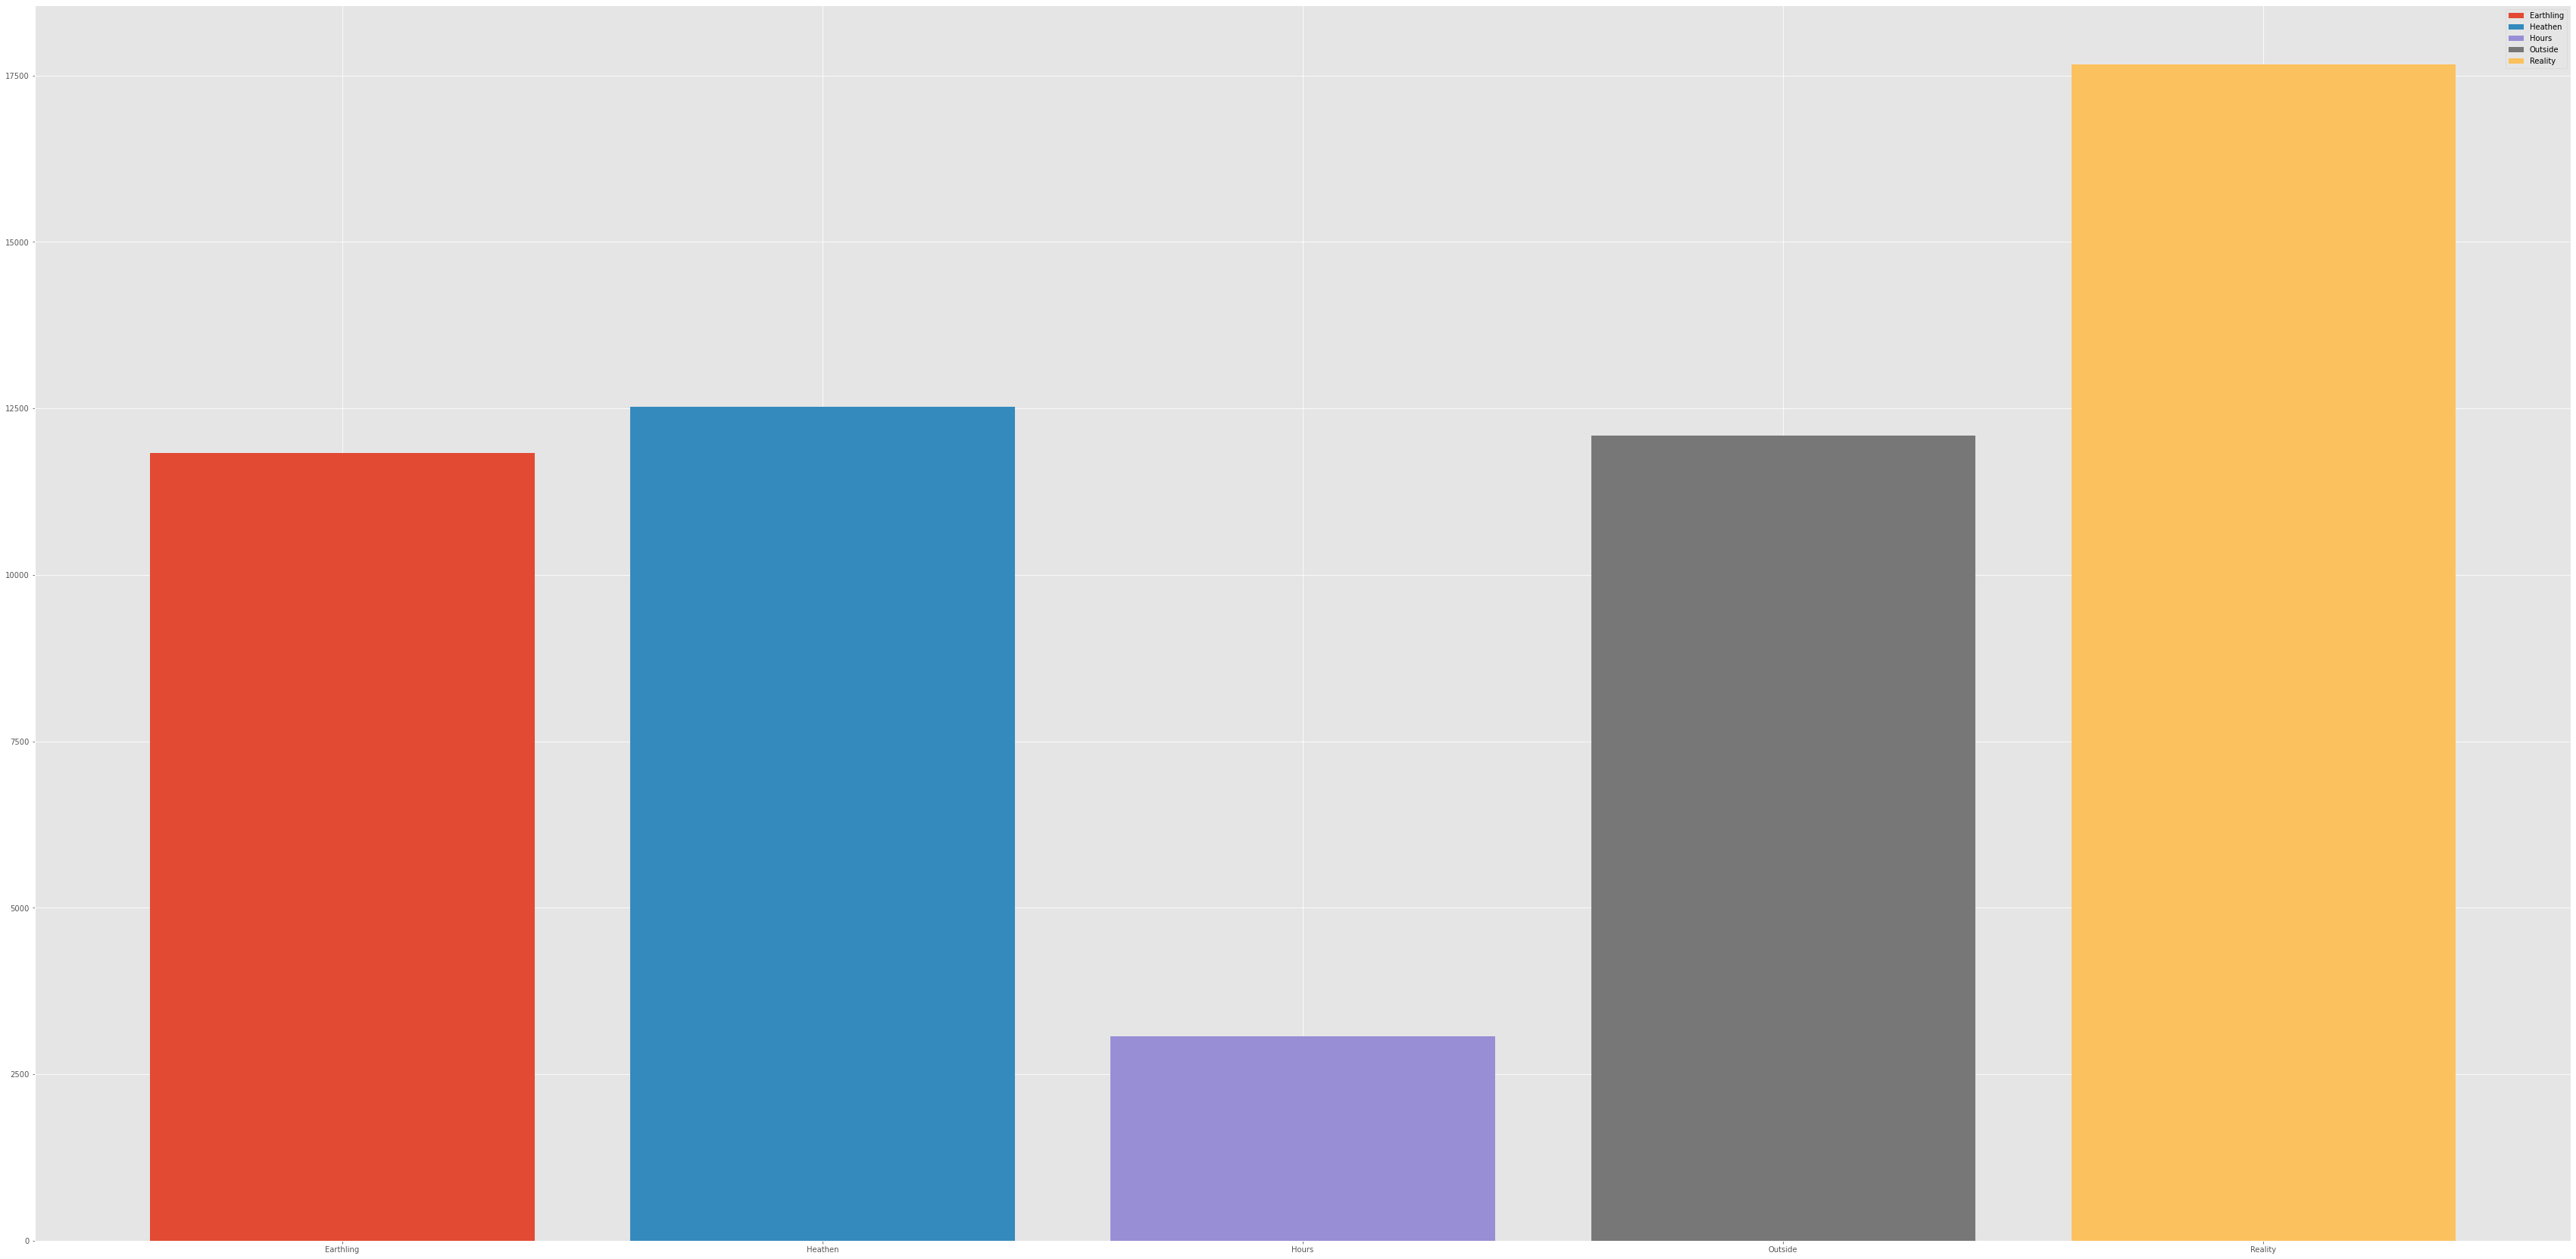

In [1]:
# For the Popex years
# Read in the document-term matrix
import pandas as pd

# for Popex
data_album_popex_dtm = pd.read_pickle('./data/pickle/groups/popex_corpus_dtm.pkl')
data_album_popex = pd.read_pickle('./data/pickle/groups/popex_corpus.pkl')
data_album_popex_dtm = data_album_popex_dtm.transpose()

# Find the top 30 words said by each album
top_dict_popex = {}
for c in data_album_popex_dtm.columns:
    top = data_album_popex_dtm[c].sort_values(ascending=False).head(30)
    top_dict_popex[c]= list(zip(top.index, top.values))
# top_dict


# Print the top 15 words said by each album
# for album, top_words in top_dict.items():
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each album
words_popex = []
for album in data_album_popex_dtm.columns:
    top = [word for (word, count) in top_dict_popex[album]]
    for t in top:
        words_popex.append(t)


# If more than half of the album have it as a top word, exclude it from the list
add_stop_words_popex = [word for word, count in Counter(words_popex).most_common() if count > 6]
# add_stop_words_popex

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean_popex = pd.read_pickle('./data/pickle/groups/popex_corpus.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words_popex)


# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_popex_corpus_cv = cv.fit_transform(data_clean_popex['texte'])
data_popex_corpus_dtm = pd.DataFrame(data_popex_corpus_cv.toarray(), columns=cv.get_feature_names())
data_popex_corpus_dtm.index = data_clean_popex.album

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_popex_corpus_dtm.to_pickle("././data/pickle/groups/data_popex_corpus_dtm.pkl")


from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=600, random_state=50)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, album in enumerate(data_album_popex_dtm.columns):
    wc.generate(data_clean_popex.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_clean_popex.album[index])

plt.show()

# Quantité de mot suivant l'album?
fig, ax = plt.subplots()
for index, album in data_clean_popex.iterrows():
    ax.bar(data_clean_popex.album[index], len(data_clean_popex.texte[index]), label=data_clean_popex.album[index])
    ax.legend()

plt.show()